# Project Title-Twitter Scraping

---


## Skills take away From This Project
- Python scripting
- Data Collection
- MongoDB
- Streamlit



---


### Domain: Social Media



#### By using the “snscrape” Library, we will be exacting the data from twitter.

In [12]:
#importing warning to filter
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Installing the snscrape library

!pip install snscrape

Defaulting to user installation because normal site-packages is not writeable


### Libraries in use will be
- snscrape- Library : It will help us in exacting the data from the social media.
- Pandas - library: It will help us in converting data into required format.

In [14]:
#import the library
import snscrape.modules.twitter as sntwitter
import pandas as pd

### We need to Advance search option
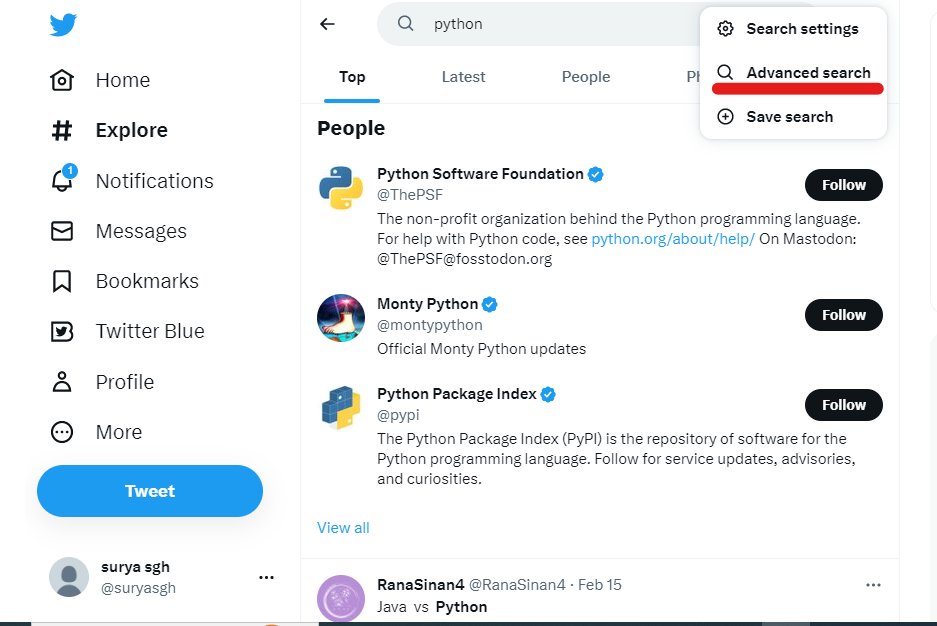

### We need to choose the account for which we to exract the data
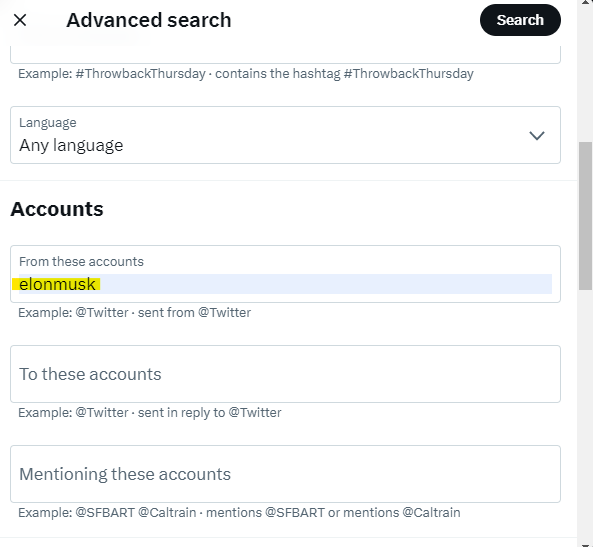

### We choosed the required data for which we want the data
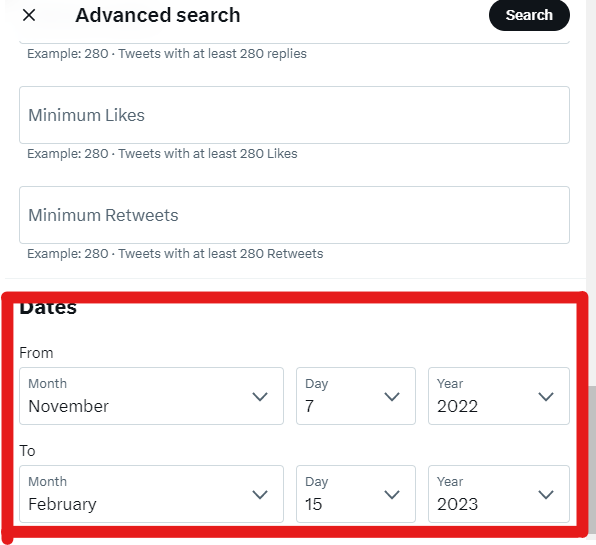

### We will this link to extract the data 
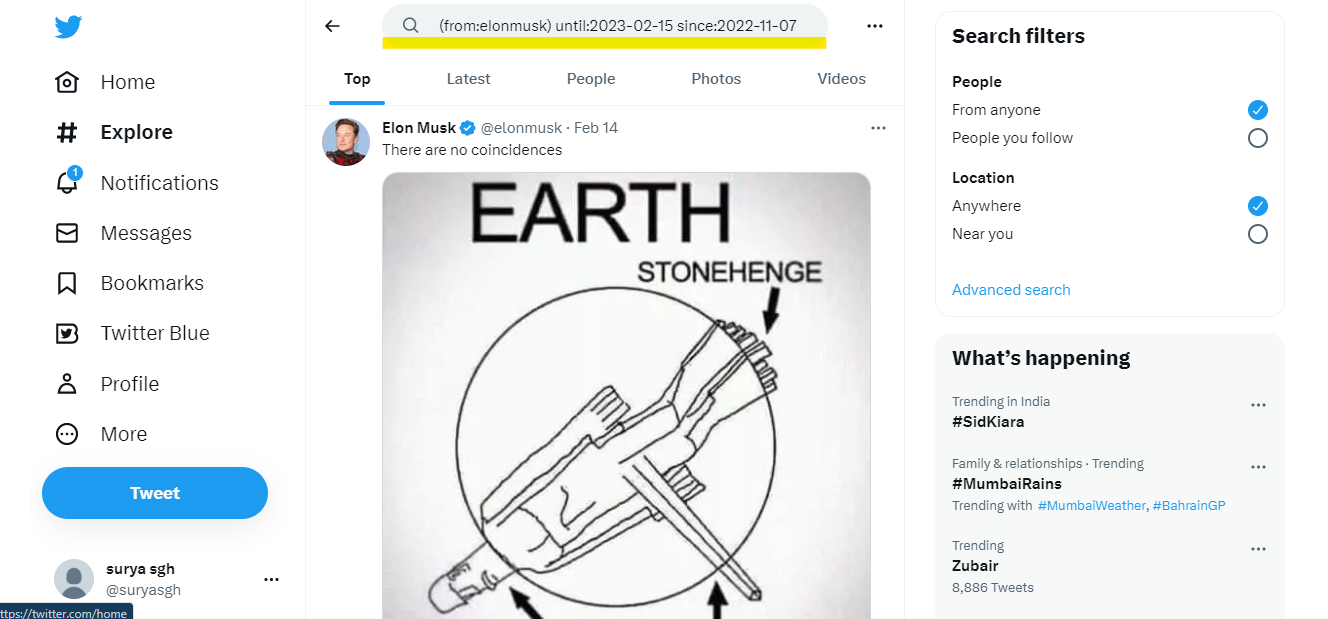

In [15]:
# Checking which the data we are receving with this
query = '(from:elonmusk) until:2023-02-15 since:2022-11-07'


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  print(vars(tweet))
  break

{'url': 'https://twitter.com/elonmusk/status/1625588142240862208', 'date': datetime.datetime(2023, 2, 14, 20, 9, 49, tzinfo=datetime.timezone.utc), 'rawContent': '@cb_doge @runews Haha exactly. I don’t even follow them and still I see their articles!', 'renderedContent': '@cb_doge @runews Haha exactly. I don’t even follow them and still I see their articles!', 'id': 1625588142240862208, 'user': User(username='elonmusk', id=44196397, displayname='Elon Musk', rawDescription='', renderedDescription='', descriptionLinks=None, verified=True, created=datetime.datetime(2009, 6, 2, 20, 12, 29, tzinfo=datetime.timezone.utc), followersCount=130718166, friendsCount=183, statusesCount=23391, favouritesCount=19142, listedCount=117721, mediaCount=1433, location='', protected=False, link=None, profileImageUrl='https://pbs.twimg.com/profile_images/1590968738358079488/IY9Gx6Ok_normal.jpg', profileBannerUrl='https://pbs.twimg.com/profile_banners/44196397/1576183471', label=None), 'replyCount': 253, 'ret

In [16]:
# running our final query and converting it into the Datafram with help of pandas
query = '(from:elonmusk) until:2023-02-15 since:2022-11-07'
tweets= []
limit = 1000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets) == limit:
    break
  else:
    tweets.append([tweet.date,tweet.id, tweet.url, tweet.content, tweet.user,tweet.replyCount,tweet.retweetCount,tweet.lang,tweet.source,tweet.likeCount])

#Converting the data into required format
df=pd.DataFrame(tweets, columns=['date', 'id', 'url', 'tweet content', 'user','reply count', 'retweet count','language', 'source', 'like count'])
print(df)

                         date                   id  \
0   2023-02-14 20:09:49+00:00  1625588142240862208   
1   2023-02-14 19:48:20+00:00  1625582733316726784   
2   2023-02-14 19:45:02+00:00  1625581905478553600   
3   2023-02-14 19:42:04+00:00  1625581158972162048   
4   2023-02-14 19:40:14+00:00  1625580694494928897   
..                        ...                  ...   
995 2022-12-28 01:48:31+00:00  1607916372797050886   
996 2022-12-27 23:46:30+00:00  1607885666138091521   
997 2022-12-27 23:44:31+00:00  1607885167716175872   
998 2022-12-27 22:43:05+00:00  1607869704588099587   
999 2022-12-27 21:26:36+00:00  1607850458554449920   

                                                   url  \
0    https://twitter.com/elonmusk/status/1625588142...   
1    https://twitter.com/elonmusk/status/1625582733...   
2    https://twitter.com/elonmusk/status/1625581905...   
3    https://twitter.com/elonmusk/status/1625581158...   
4    https://twitter.com/elonmusk/status/1625580694...   
.. 

In [17]:
# check the data 
df.head()

,date,id,url,tweet content,user,reply count,retweet count,language,source,like count
0,2023-02-14 20:09:49+00:00,1625588142240862208,https://twitter.com/elonmusk/status/1625588142...,@cb_doge @runews Haha exactly. I don’t even fo...,https://twitter.com/elonmusk,253,175,en,"<a href=""http://twitter.com/download/iphone"" r...",2753
1,2023-02-14 19:48:20+00:00,1625582733316726784,https://twitter.com/elonmusk/status/1625582733...,@monitoringbias Science-fiction ftw,https://twitter.com/elonmusk,507,274,en,"<a href=""http://twitter.com/download/iphone"" r...",6342
2,2023-02-14 19:45:02+00:00,1625581905478553600,https://twitter.com/elonmusk/status/1625581905...,@runews Just like other media lol,https://twitter.com/elonmusk,905,348,en,"<a href=""http://twitter.com/download/iphone"" r...",14163
3,2023-02-14 19:42:04+00:00,1625581158972162048,https://twitter.com/elonmusk/status/1625581158...,@BillyM2k I get all my opinions from Twitter,https://twitter.com/elonmusk,1971,1047,en,"<a href=""http://twitter.com/download/iphone"" r...",23222
4,2023-02-14 19:40:14+00:00,1625580694494928897,https://twitter.com/elonmusk/status/1625580694...,@WallStreetSilv Low birth rates lead to ghost ...,https://twitter.com/elonmusk,5162,4107,en,"<a href=""http://twitter.com/download/iphone"" r...",51744


In [18]:
# checking the shape of the dataframe
df.shape

(1000, 10)

In [7]:
#extracting the data into csv file.
df.to_csv('Twitter Scraping.csv')